In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from math import exp, sqrt, pi, cos, sin

In [2]:
class HydrogenicAtom:
    """
    This class models the wavefunctions and energy levels of a hydrogenic atom.
    
    It assumes an infinitely heavy nucleus, so the mass is that of the
    electron.
    
    Masses are in kg, distances are in m
    
    This whole class uses complex numbers and math functions.
    """
    
    def __init__(self, n, l, z=1):
        """
        This sets some instance attributes and a few constant used throughout the
        class.
        
        Leave z at 1 for hydrogen.
        
        Parameters
        ----------    
        n: int
            0, 1, 2,...
            
        l: int
            0, 1, 2, 3
            
        z: int
            Number of protons in the nucleus. Defaults to 1.
        """
        self.a0 = 5.29e-11       # m
        self.me = 9.10938356e-31 # kg
        self.rh = 109677         # cm^-1, Rydberg constant 
        self.n = n
        self.l = l
        self.z = z
        
    def rydberg(self, n1, n2):
        """
        Calculates the Rydberg wavenumber between n1 and n2.
        
        Parameters
        ----------
        n1: int
            The n1 level
        
        n2: int
            The n2 level
            
        Returns
        -------
        float
            Wavenumber of the transition
        """
        t1 = 1 / n1 ** 2
        t2 = 1 / n2 ** 2
        return self.rh * (t1 - t2)
        
    def rho(self, r):
        """
        Calculates the rho part of the radial function. It assumes an infinitely
        heavy nucleus.
        
        From Atkins and de Paula, Table 10.1, page 324
        
        Parameters
        ----------
        r: float
            The distance, in meters being calculated
            
        Returns
        -------
        float
            The value of rho.
        """
        return (2 * self.z / self.n / self.a0) * r
    
    def radial(self, r):
        """
        The radial part of the wavefunction
        
        Parameters
        ----------
        r: float
            Radius, in meters
            
        Returns
        -------
        complex
            The value of the radial wavefunction, which only uses the real
            part of the complex value.
            
        Raises
        ------
        Exception
            Raises an exception for invalid n and l
        """
        za32 = (self.z / self.a0) ** (3/2)
        rho = self.rho(r)
        exp_rho = exp(-rho / 2.0)
        
        if self.n == 1 and self.l == 0:  # 1s orbital
            return 2 * za32 * exp_rho
        elif self.n == 2 and self.l == 0:  # 2s orbital
            return (1.0 / sqrt(8)) * za32 * (2.0 - rho) * exp_rho
        elif self.n == 2 and self.l == 1:  # 2p orbital
            return (1.0 / sqrt(24)) * za32 * rho * exp_rho
        elif self.n == 3 and self.l == 0:
            return (1.0 / sqrt(243)) * za32 * (6.0 - 6 * rho + rho ** 2) * exp_rho
        elif self.n == 3 and self.l == 1:
            return (1.0 / sqrt(486)) * za32 * (4.0 - rho) * rho * exp_rho
        elif self.n == 3 and self.l == 2:
            return (1.0 / sqrt(2430)) * za32 * rho ** 2 * exp_rho
        else:
            raise Exception(f'No radial function for {self.n} and {self.l}')

Text(0.5, 1.0, 'intentionally blank')

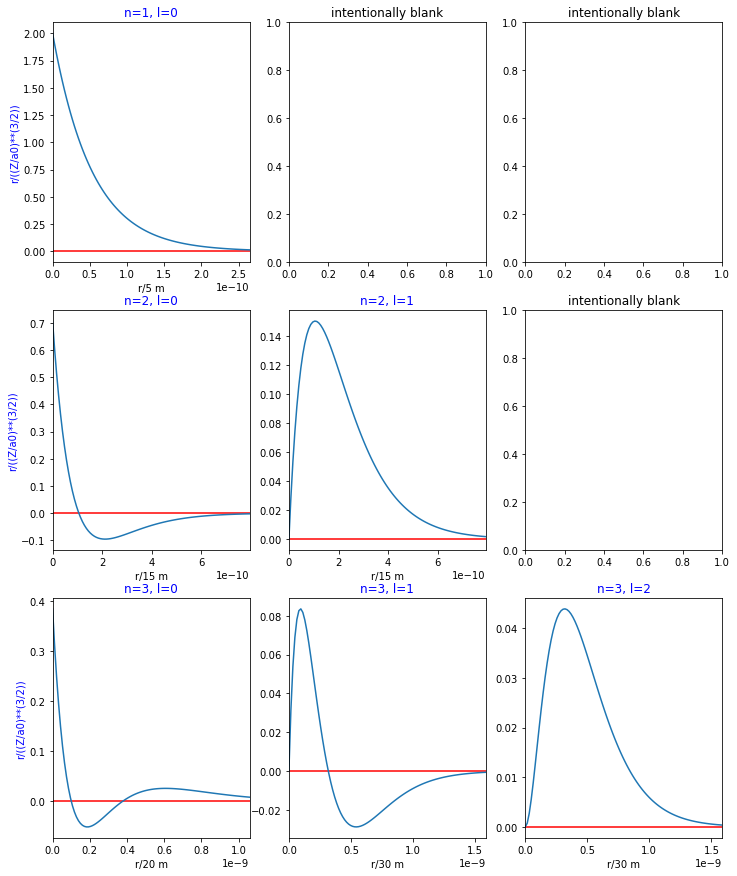

In [4]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 15))

# Just so I can access instance variables in an instance to make the dictionary.
ha = HydrogenicAtom(n=2, l=1)
yscaler = (ha.z / ha.a0)**(3/2)

parameters = [
    {'n': 1, 'l': 0, 'x_scaler': 5, 'yscaler':  yscaler },
    {'n': 2, 'l': 0, 'x_scaler': 15, 'yscaler': yscaler },
    {'n': 3, 'l': 0, 'x_scaler': 20, 'yscaler': yscaler },
    {'n': 2, 'l': 1, 'x_scaler': 15, 'yscaler': yscaler },
    {'n': 3, 'l': 1, 'x_scaler': 30, 'yscaler': yscaler },
    {'n': 3, 'l': 2, 'x_scaler': 30, 'yscaler': yscaler }
]

for p in parameters:
    row = p['n'] - 1
    col = p['l']
    ha = HydrogenicAtom(n=p['n'], l=p['l'])
    xs = np.linspace(0, ha.a0 * p['x_scaler'], 100)
    ys = [ha.radial(r) / p['yscaler'] for r in xs]
    ax = axs[row, col]
    ax.set_title(f'n={p["n"]}, l={p["l"]}', color='b')
    ax.set_xlim(min(xs), max(xs))
    if col == 0:
        ax.set_ylabel('r/((Z/a0)**(3/2))', color='b')
    ax.set_xlabel(f'r/{p["x_scaler"]} m')
    ax.axhline(0.0, color='r')
    ax.plot(xs, ys)
    
axs[0, 1].set_title('intentionally blank')
axs[0, 2].set_title('intentionally blank')
axs[1, 2].set_title('intentionally blank')